In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from copy import deepcopy
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter
import pandas as pd

In [2]:
plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=15
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [3]:
M = 3
m=np.arange(1,M+1)
epsilon=0.001
delta=0.003
Delta=1.
w1=1.

In [4]:
def coupling_m(n,coup): #def g_m
    return coup*np.sin(n*np.pi/2.)*np.sqrt(n)/(1.+delta*(n-1.))

In [5]:
sigma_x=np.array([[0,1],[1,0]])
sigma_z=np.array([[1,0],[0,-1]])
spin_id=np.eye(2)
n_cutoff=3
ph_id=np.eye(n_cutoff+1)
#for i in range(M):
    #print(i)
#ph_id
x=np.array([1])
np.kron(spin_id,x)

array([[1., 0.],
       [0., 1.]])

In [6]:
def a_dagger_matrix(cutoff):
    matrix=np.zeros((cutoff+1,cutoff+1))
    for i in range(1,cutoff+1):
        matrix[i][i-1]+=np.sqrt(i)
    return matrix

In [7]:
a_dagger=a_dagger_matrix(n_cutoff)
a=a_dagger.conj().T
a_dagger@a

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 3.]])

In [8]:
def iter_kron(matrix,times):
    if(times==0):
        x=np.array([1])
        return x
    else:
        B=matrix
        for i in range(times-1):
            B=np.kron(B,matrix)
        return B

In [9]:
def four_kron(matrix1,matrix2,matrix3,matrix4):
    return np.kron(matrix1,np.kron(matrix2,np.kron(matrix3,matrix4)))

In [10]:
def Hamiltonian(n_cutoff,M,g):
    sigma_x=np.array([[0,1],[1,0]])
    sigma_z=np.array([[1,0],[0,-1]])
    spin_id=np.eye(2)
    ph_id=np.eye(n_cutoff+1)
    a_dagger=a_dagger_matrix(n_cutoff)
    a=a_dagger.conj().T
    H=np.zeros((2*(n_cutoff+1)**(M),2*(n_cutoff+1)**(M)))
    H+=Delta*0.5*np.kron(sigma_x,iter_kron(ph_id,M)) + epsilon*0.5*np.kron(sigma_z,iter_kron(ph_id,M)) #TLS term
    for i in range(M): #Hmultimode and Hint
        H+=(i+1)*w1*four_kron(spin_id,iter_kron(ph_id,i),a_dagger@a,iter_kron(ph_id,M-i-1))
        H+=coupling_m((i+1),g)*four_kron(sigma_z,iter_kron(ph_id,i),a_dagger+a,iter_kron(ph_id,M-i-1))
    return H

In [11]:
Energies=[]
GS=[]
gs=np.linspace(0,2,50)
sxs=[]
szs=[]
expectHs=[]
sigma_x=np.array([[0,1],[1,0]])
sigma_z=np.array([[1,0],[0,-1]])

for g in gs:
    H=Hamiltonian(n_cutoff,M,g)
    vals,vects=np.linalg.eigh(H)
    Energies.append(vals-vals[0])
    GS.append(vals[0])
    v0=vects[:,0] #GS vector
    expectsigx=v0.T.dot(np.kron(sigma_x,iter_kron(ph_id,M)).dot(v0))
    expectsigz=v0.T.dot(np.kron(sigma_z,iter_kron(ph_id,M)).dot(v0))
    expectH=v0.T.dot(H.dot(v0))
    sxs.append(-expectsigx)
    szs.append(-expectsigz)#minus applied to both sigmas as in the polaron code
    expectHs.append(expectH)

#print(H)
#np.save("Energies_M3_ncut9",Energies)
#np.save("GS_M3_ncut9",GS)
#np.save("sxs_M3_ncut9",sxs)
#np.save("szs_M3_ncut9",szs)
#np.save("expectHs_M3_ncut3",)

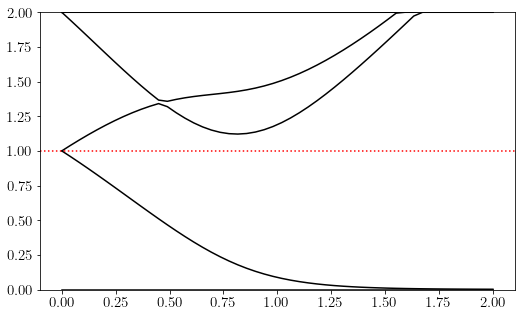

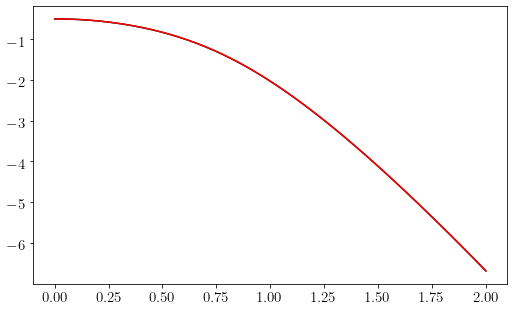

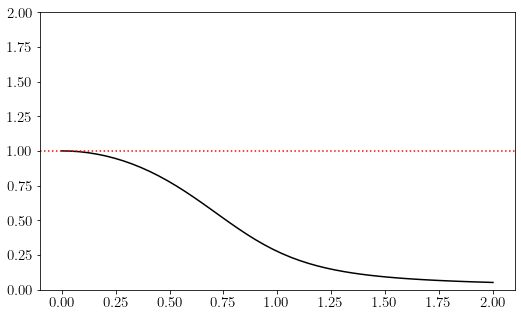

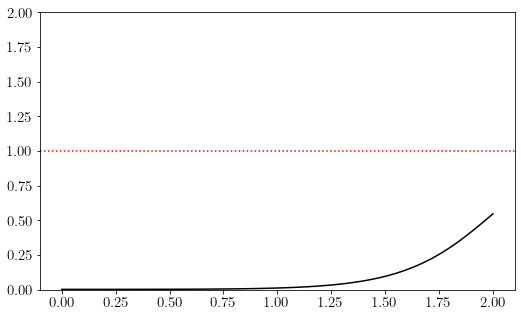

In [12]:
plt.plot(gs,Energies,c="k")
plt.axhline(1,c="r",ls="dotted")
plt.ylim(0,2)
plt.show()

plt.plot(gs,GS,c="k")
plt.plot(gs,expectHs,c="r")
plt.show()

plt.plot(gs,sxs,c="k")
plt.axhline(1,c="r",ls="dotted")
plt.ylim(0,2)
plt.show()

plt.plot(gs,szs,c="k")
plt.axhline(1,c="r",ls="dotted")
plt.ylim(0,2)
plt.show()
